In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [342]:
df=pd.read_csv("supela.csv")
df.head()

,date,population
0,05-01-2022,55
1,16-02-2022,59
2,07-03-2022,52
3,28-03-2022,46
4,22-04-2022,54


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        14 non-null     object
 1   population  14 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 352.0+ bytes


In [344]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [345]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-345-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [347]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [348]:
 from prophet import Prophet

In [349]:
population=df.groupby('date')['population'].sum().reset_index()

In [350]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [351]:
model=Prophet(interval_width=0.95)

In [352]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/abrxyz46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/elqk3zes.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90661', 'data', 'file=/tmp/tmpqki2d_87/abrxyz46.json', 'init=/tmp/tmpqki2d_87/elqk3zes.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modeljkbtjwfe/prophet_model-20230421070355.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:03:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:03:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [353]:
future_dates=model.make_future_dataframe(periods=30)

In [354]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-06  43.129308   53.719611   67.795769    43.129308    43.129308   
1  2022-02-16  42.167716   51.748929   67.392609    42.167716    42.167716   
2  2022-03-28  41.229578   38.028789   53.534525    41.229578    41.229578   
3  2022-04-22  40.643241   46.871546   61.417543    40.643241    40.643241   
4  2022-05-01  40.432160   48.244680   62.162732    40.432160    40.432160   
5  2022-07-03  38.954592   46.421216   60.503997    38.954592    38.954592   
6  2022-09-11  37.312850   45.135651   58.689792    37.312850    37.312850   
7  2022-09-29  36.890684   46.499111   62.053639    36.890684    36.890684   
8  2022-10-05  36.749962   47.239833   61.730603    36.749962    36.749962   
9  2022-10-08  36.679601   48.893810   63.358717    36.679601    36.679601   
10 2022-10-30  36.163621   43.701067   58.265314    36.163621    36.163621   
11 2022-12-07  35.272383   45.396789   60.193446    35.272383   

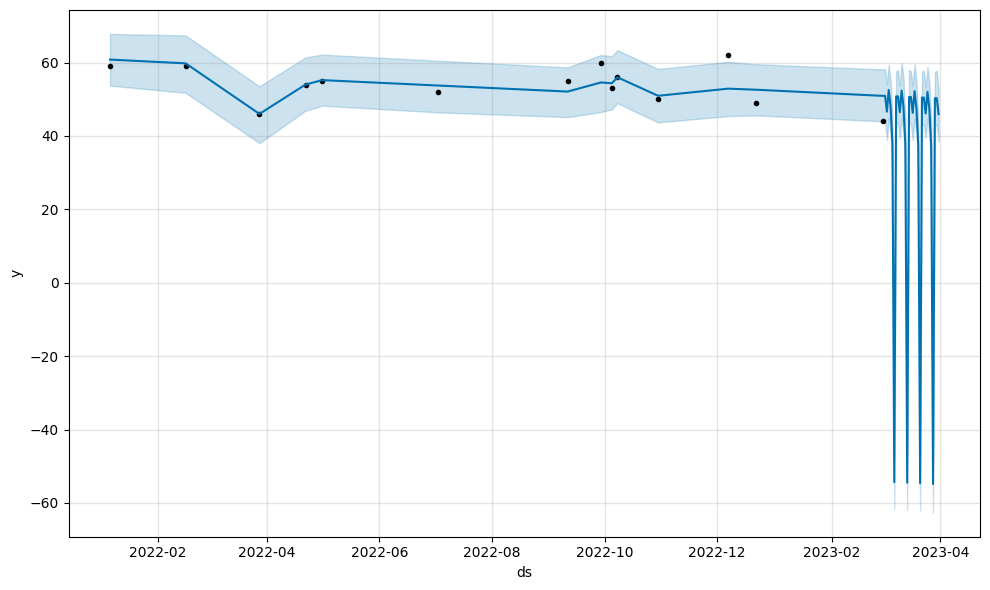

In [355]:
model.plot(forecast)
print(forecast)

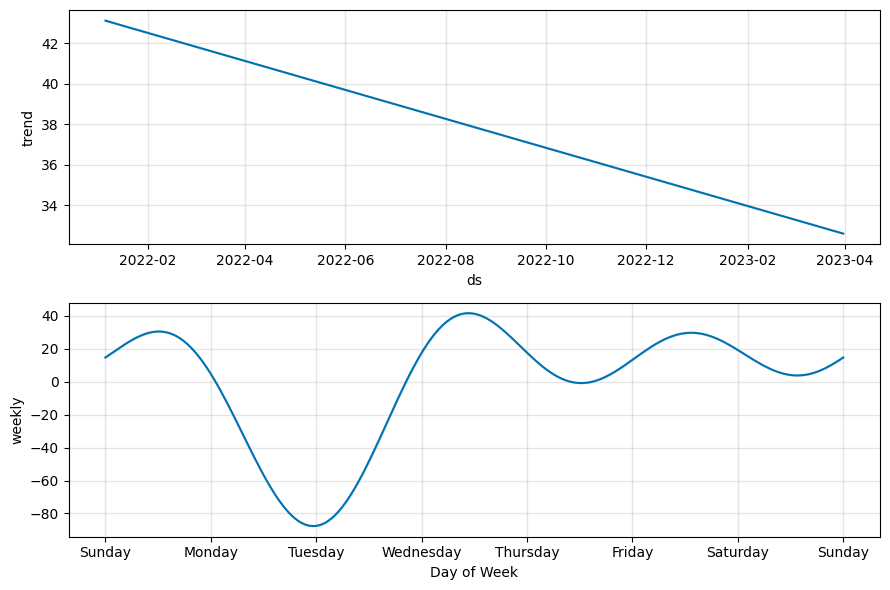

In [356]:
component=model.plot_components(forecast)

In [358]:
 model1=Prophet(interval_width=0.95)

In [359]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/t56fqeo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/zbp7u5hx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7707', 'data', 'file=/tmp/tmpqki2d_87/t56fqeo1.json', 'init=/tmp/tmpqki2d_87/zbp7u5hx.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model40a3vzyr/prophet_model-20230421070625.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:06:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [360]:
future_dates=model1.make_future_dataframe(periods=10)

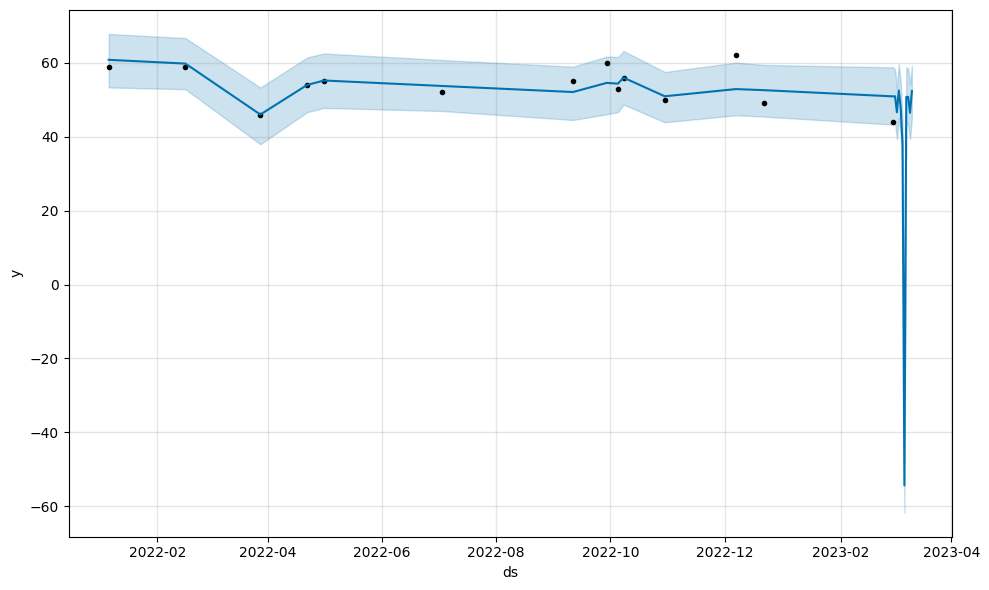

In [361]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-06  43.129308   53.333220   67.809667    43.129308    43.129308   
1  2022-02-16  42.167716   52.853682   66.695857    42.167716    42.167716   
2  2022-03-28  41.229578   37.962355   53.297742    41.229578    41.229578   
3  2022-04-22  40.643241   46.640310   61.443322    40.643241    40.643241   
4  2022-05-01  40.432160   47.798390   62.518291    40.432160    40.432160   
5  2022-07-03  38.954592   46.962119   60.771941    38.954592    38.954592   
6  2022-09-11  37.312850   44.527410   58.947313    37.312850    37.312850   
7  2022-09-29  36.890684   46.064314   61.689609    36.890684    36.890684   
8  2022-10-05  36.749962   46.655942   61.544892    36.749962    36.749962   
9  2022-10-08  36.679601   48.701057   63.195211    36.679601    36.679601   
10 2022-10-30  36.163621   43.901128   57.514884    36.163621    36.163621   
11 2022-12-07  35.272383   45.804973   60.050815    35.272383   

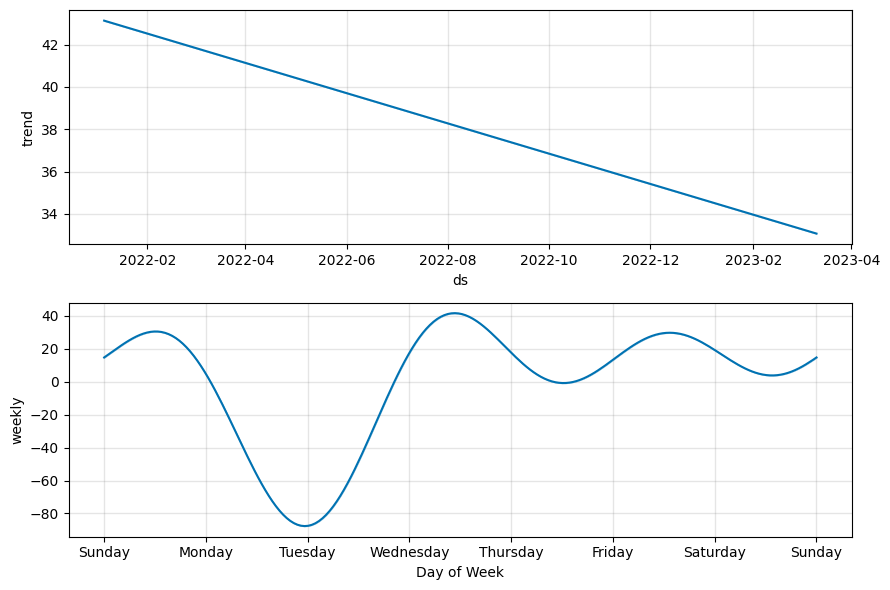

In [362]:
week=model1.plot_components(forecasting)
print(forecasting)